In [1]:
from matplotlib import pyplot as pylt
import pandas as pd
import numpy as np
from collections import defaultdict

In [2]:
df = pd.read_csv('~/Documents/manual_segmentation_results/mesh.csv')

Fill NaN values with overall dataset mean.

In [3]:
print(f'Filling {df[df.isna().any(axis=1)].shape[0]} instances containing NaN values.')

Filling 1 instances containing NaN values.


In [4]:
d = defaultdict()
for column in df.columns:
    d[column] = df[column].mean()

In [5]:
df.fillna(value=d, inplace=True)

In [6]:
df

,dir,ecLF,ccLF,icLF,icMF,ccMF,ecMF,icMF.aSD,icMF.aMav,icMF.aMiv,...,eLT.aMiv,cMT.aSD,cMT.aMav,cMT.aMiv,iMT.aSD,iMT.aMav,iMT.aMiv,iLT.aSD,iLT.aMav,iLT.aMiv
0,9162498,3.398362,4.416929,4.544211,6.056176,4.416770,3.542121,7.579687,35.183922,1.692840,...,1.514314,1.170298,5.215110,1.384386,1.033854,4.000587,0.739802,2.365973,6.018646,0.522279
1,9211751,3.844091,4.647206,4.390967,5.232782,4.641971,3.802650,6.211266,26.282218,1.444123,...,0.760725,0.639852,4.292861,2.076173,1.057026,4.332908,1.177752,6.823505,14.634288,0.721764
2,9230284,4.050646,3.995720,4.752620,4.501517,3.666120,3.046581,3.448252,13.399680,0.995223,...,0.645580,0.598752,5.959318,3.777749,1.742130,6.542073,1.785402,2.856373,10.205774,0.917524
3,9156526,3.740377,3.611178,3.223112,3.401091,3.647043,2.726586,1.246072,6.671591,1.404358,...,0.685445,0.773270,4.646124,2.084289,1.182110,4.613066,0.821416,7.950937,29.019702,0.493905
4,9246518,4.570822,4.601870,5.222757,5.618160,5.064488,4.278688,6.209417,27.485320,1.771027,...,1.048021,1.328704,6.382262,2.238128,2.385731,6.221756,1.249180,3.657645,8.115975,1.200102
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
353,9141244,3.756824,4.772580,5.256606,6.027316,4.532668,4.159179,6.445766,30.075833,1.196804,...,0.827987,0.911500,4.602748,1.429880,2.877553,8.321350,1.250732,1.655886,5.130344,0.637755
354,9001104,2.776258,3.562488,3.805493,4.412087,3.151274,2.580750,6.863031,29.195196,0.972429,...,0.975870,0.747105,4.329628,1.857638,2.789616,6.918740,0.922999,4.297192,8.988372,0.610602
355,9034644,2.972532,3.436399,3.661724,3.660416,3.406138,3.094697,4.206529,15.773849,1.231944,...,0.869834,0.761113,7.448227,5.938108,7.473611,28.539228,2.459230,3.356466,8.779508,0.511667
356,9109448,4.151595,4.758357,5.030160,5.005369,4.915793,3.746217,2.876549,12.730678,1.560726,...,0.677641,0.900406,4.343015,1.360281,4.381814,15.722768,2.123763,3.749586,11.345377,1.194309


In [7]:
df.columns

Index(['dir', 'ecLF', 'ccLF', 'icLF', 'icMF', 'ccMF', 'ecMF', 'icMF.aSD',
       'icMF.aMav', 'icMF.aMiv', 'ccLF.aSD', 'ccLF.aMav', 'ccLF.aMiv',
       'ccMF.aSD', 'ccMF.aMav', 'ccMF.aMiv', 'icLF.aSD', 'icLF.aMav',
       'icLF.aMiv', 'ecLF.aSD', 'ecLF.aMav', 'ecLF.aMiv', 'ecMF.aSD',
       'ecMF.aMav', 'ecMF.aMiv', 'cLT', 'aLT', 'eLT', 'pLT', 'iLT', 'cMT',
       'aMT', 'eMT', 'pMT', 'iMT', 'aMT.aSD', 'aMT.aMav', 'aMT.aMiv',
       'aLT.aSD', 'aLT.aMav', 'aLT.aMiv', 'cLT.aSD', 'cLT.aMav', 'cLT.aMiv',
       'pLT.aSD', 'pLT.aMav', 'pLT.aMiv', 'eMT.aSD', 'eMT.aMav', 'eMT.aMiv',
       'pMT.aSD', 'pMT.aMav', 'pMT.aMiv', 'eLT.aSD', 'eLT.aMav', 'eLT.aMiv',
       'cMT.aSD', 'cMT.aMav', 'cMT.aMiv', 'iMT.aSD', 'iMT.aMav', 'iMT.aMiv',
       'iLT.aSD', 'iLT.aMav', 'iLT.aMiv'],
      dtype='object')

In [8]:
eclf = df['ecLF']
cclf = df['ccLF']
iclf = df['icLF']
icmf = df['icMF']
ccmf = df['ccMF']
ecmf = df['ecMF']

elt = df['eLT']
plt = df['pLT']
ilt = df['iLT']
alt = df['aLT']
clt = df['cLT']

emt = df['eMT']
pmt = df['pMT']
imt = df['iMT']
amt = df['aMT']
cmt = df['cMT']

In [9]:
xs = np.arange(0, df.shape[0])
len(xs)

358

# Mesh

## Subregion scatters

### Femur

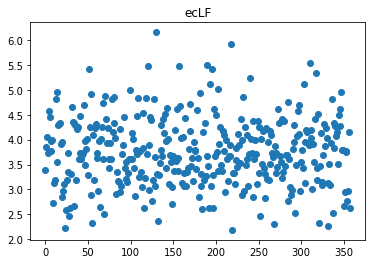

In [10]:
ys = eclf.to_numpy()
pylt.scatter(x=xs, y=ys)
pylt.title('ecLF')
for i in range(len(xs)):
    pass
    # pylt.text(xs[i], ys[i], i)

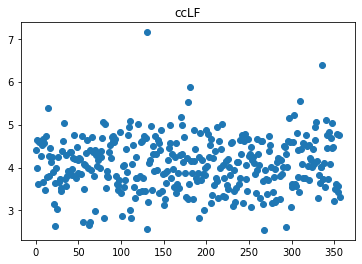

In [11]:
ys = cclf.to_numpy()
pylt.scatter(x=xs, y=ys)
pylt.title('ccLF')
for i in range(len(xs)):
    pass
    # pylt.text(xs[i], ys[i], i)

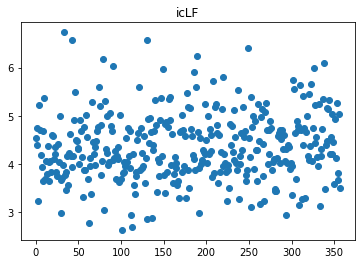

In [12]:
ys = iclf.to_numpy()
pylt.scatter(x=xs, y=ys)
pylt.title('icLF')
for i in range(len(xs)):
    pass
    # pylt.text(xs[i], ys[i], i)

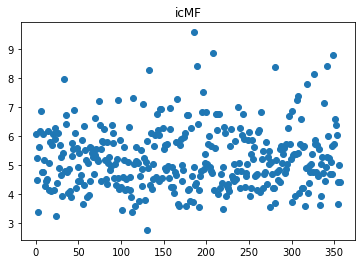

In [13]:
ys = icmf.to_numpy()
pylt.scatter(x=xs, y=ys)
pylt.title('icMF')
for i in range(len(xs)):
    pass
    # pylt.text(xs[i], ys[i], i)

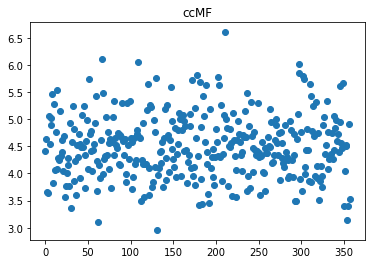

In [14]:
ys = ccmf.to_numpy()
pylt.scatter(x=xs, y=ys)
pylt.title('ccMF')
for i in range(len(xs)):
    pass
    # pylt.text(xs[i], ys[i], i)

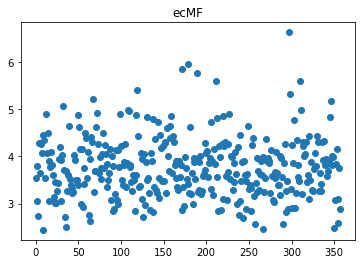

In [15]:
ys = ecmf.to_numpy()
pylt.scatter(x=xs, y=ys)
pylt.title('ecMF')
for i in range(len(xs)):
    pass
    # pylt.text(xs[i], ys[i], i)

### Tibia

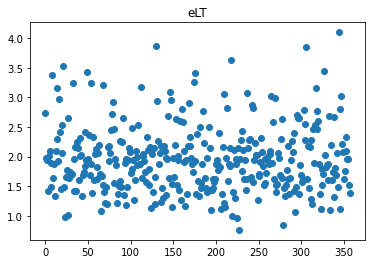

In [16]:
ys = elt.to_numpy()
pylt.scatter(x=xs, y=ys)
pylt.title('eLT')
for i in range(len(xs)):
    pass
    # pylt.text(xs[i], ys[i], i)

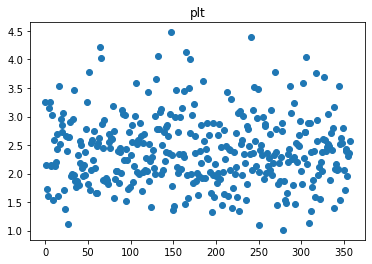

In [17]:
ys = plt.to_numpy()
pylt.scatter(x=xs, y=ys)
pylt.title('plt')
for i in range(len(xs)):
    pass
    # pylt.text(xs[i], ys[i], i)

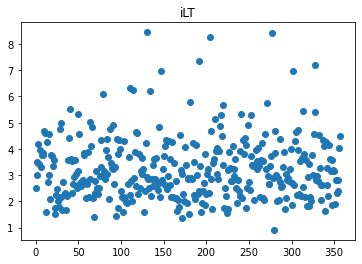

In [18]:
ys = ilt.to_numpy()
pylt.scatter(x=xs, y=ys)
pylt.title('iLT')
for i in range(len(xs)):
    pass
    # pylt.text(xs[i], ys[i], i)

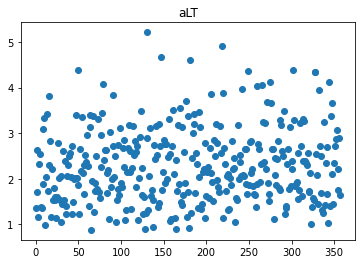

In [19]:
ys = alt.to_numpy()
pylt.scatter(x=xs, y=ys)
pylt.title('aLT')
for i in range(len(xs)):
    pass
    # pylt.text(xs[i], ys[i], i)

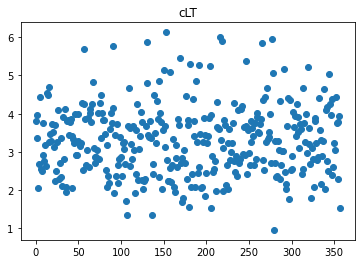

In [20]:
ys = clt.to_numpy()
pylt.scatter(x=xs, y=ys)
pylt.title('cLT')
for i in range(len(xs)):
    pass
    # pylt.text(xs[i], ys[i], i)

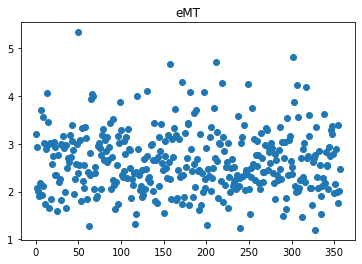

In [21]:
ys = emt.to_numpy()
pylt.scatter(x=xs, y=ys)
pylt.title('eMT')
for i in range(len(xs)):
    pass
    # pylt.text(xs[i], ys[i], i)

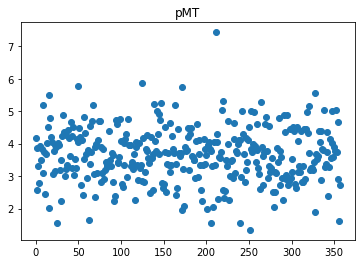

In [22]:
ys = pmt.to_numpy()
pylt.scatter(x=xs, y=ys)
pylt.title('pMT')
for i in range(len(xs)):
    pass
    # pylt.text(xs[i], ys[i], i)

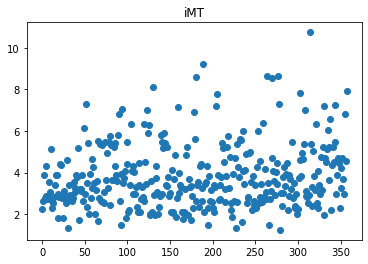

In [23]:
ys = imt.to_numpy()
pylt.scatter(x=xs, y=ys)
pylt.title('iMT')
for i in range(len(xs)):
    pass
    # pylt.text(xs[i], ys[i], i)

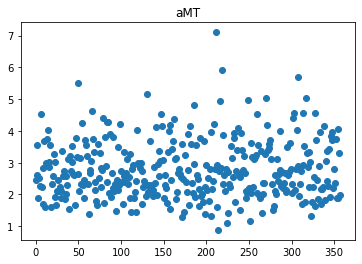

In [24]:
ys = amt.to_numpy()
pylt.scatter(x=xs, y=ys)
pylt.title('aMT')
for i in range(len(xs)):
    pass
    # pylt.text(xs[i], ys[i], i)

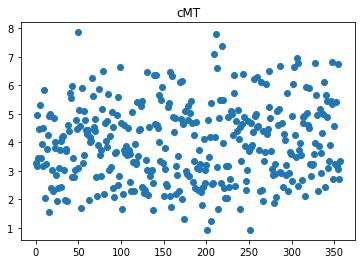

In [25]:
ys = cmt.to_numpy()
pylt.scatter(x=xs, y=ys)
pylt.title('cMT')
for i in range(len(xs)):
    pass
    # pylt.text(xs[i], ys[i], i)

## Subregion boxplots

### Femur

Segmentation 9606490.0 is an outlier (2.43 total deviation from median)
Segmentation 9388068.0 is an outlier (2.20 total deviation from median)


Text(0.5, 1.0, 'ecLF')

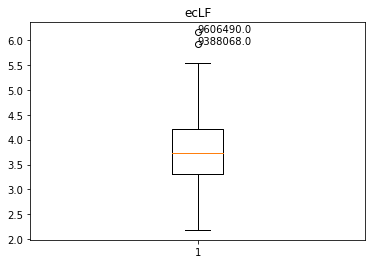

In [26]:
ys = eclf.to_numpy()
pylt.boxplot(ys)
q1 = eclf.quantile(.25)
q3 = eclf.quantile(.75)
ot = q3 + 1.5 * (q3 - q1)
ob = q1 - 1.5 * (q3 - q1)
for i, y in enumerate(ys):
    if y > ot or y < ob:
        pylt.text(1, y, df.iloc[i]['dir'])
        print(f'Segmentation {df.iloc[i]["dir"]} is an outlier ({abs(y - eclf.median()):.2f} total deviation from median)')
        
pylt.title('ecLF')

Segmentation 9606490.0 is an outlier (3.08 total deviation from median)
Segmentation 9468561.0 is an outlier (1.80 total deviation from median)
Segmentation 9108461.0 is an outlier (2.32 total deviation from median)


Text(0.5, 1.0, 'ccLF')

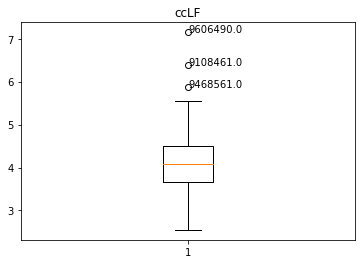

In [27]:
ys = cclf.to_numpy()
pylt.boxplot(ys)
q1 = cclf.quantile(.25)
q3 = cclf.quantile(.75)
ot = q3 + 1.5 * (q3 - q1)
ob = q1 - 1.5 * (q3 - q1)
for i, y in enumerate(ys):
    if y > ot or y < ob:
        pylt.text(1, y, df.iloc[i]['dir'])
        print(f'Segmentation {df.iloc[i]["dir"]} is an outlier ({abs(y - cclf.median()):.2f} total deviation from median)')
        
pylt.title('ccLF')

Segmentation 9245519.0 is an outlier (2.45 total deviation from median)
Segmentation 9162394.0 is an outlier (2.29 total deviation from median)
Segmentation 9707649.0 is an outlier (1.90 total deviation from median)
Segmentation 9606490.0 is an outlier (2.30 total deviation from median)
Segmentation 9539141.0 is an outlier (1.96 total deviation from median)
Segmentation 9323079.0 is an outlier (2.13 total deviation from median)
Segmentation 9027422.0 is an outlier (1.80 total deviation from median)


Text(0.5, 1.0, 'icLF')

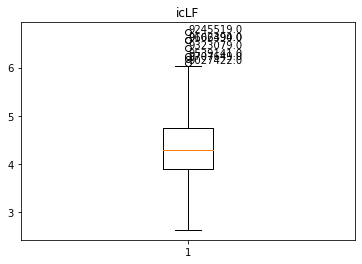

In [28]:
ys = iclf.to_numpy()
pylt.boxplot(ys)
q1 = iclf.quantile(.25)
q3 = iclf.quantile(.75)
ot = q3 + 1.5 * (q3 - q1)
ob = q1 - 1.5 * (q3 - q1)
for i, y in enumerate(ys):
    if y > ot or y < ob:
        pylt.text(1, y, df.iloc[i]['dir'])
        print(f'Segmentation {df.iloc[i]["dir"]} is an outlier ({abs(y - iclf.median()):.2f} total deviation from median)')
        
pylt.title('icLF')

Segmentation 9245519.0 is an outlier (2.89 total deviation from median)
Segmentation 9768869.0 is an outlier (3.21 total deviation from median)
Segmentation 9469318.0 is an outlier (4.50 total deviation from median)
Segmentation 9539141.0 is an outlier (3.35 total deviation from median)
Segmentation 9371267.0 is an outlier (3.78 total deviation from median)
Segmentation 9078486.0 is an outlier (3.30 total deviation from median)
Segmentation 9055836.0 is an outlier (3.07 total deviation from median)
Segmentation 9006723.0 is an outlier (3.35 total deviation from median)
Segmentation 9118430.0 is an outlier (3.70 total deviation from median)


Text(0.5, 1.0, 'icMF')

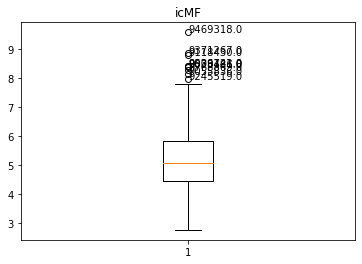

In [29]:
ys = icmf.to_numpy()
pylt.boxplot(ys)
q1 = icmf.quantile(.25)
q3 = icmf.quantile(.75)
ot = q3 + 1.5 * (q3 - q1)
ob = q1 - 1.5 * (q3 - q1)
for i, y in enumerate(ys):
    if y > ot or y < ob:
        pylt.text(1, y, df.iloc[i]['dir'])
        print(f'Segmentation {df.iloc[i]["dir"]} is an outlier ({abs(y - icmf.median()):.2f} total deviation from median)')
        
pylt.title('icMF')

Segmentation 9145695.0 is an outlier (1.63 total deviation from median)
Segmentation 9617689.0 is an outlier (1.58 total deviation from median)
Segmentation 9568504.0 is an outlier (1.51 total deviation from median)
Segmentation 9291078.0 is an outlier (2.13 total deviation from median)
Segmentation 9113018.0 is an outlier (1.54 total deviation from median)


Text(0.5, 1.0, 'ccMF')

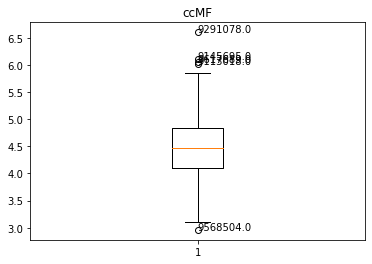

In [30]:
ys = ccmf.to_numpy()
pylt.boxplot(ys)
q1 = ccmf.quantile(.25)
q3 = ccmf.quantile(.75)
ot = q3 + 1.5 * (q3 - q1)
ob = q1 - 1.5 * (q3 - q1)
for i, y in enumerate(ys):
    if y > ot or y < ob:
        pylt.text(1, y, df.iloc[i]['dir'])
        print(f'Segmentation {df.iloc[i]["dir"]} is an outlier ({abs(y - ccmf.median()):.2f} total deviation from median)')
        
pylt.title('ccMF')

Segmentation 9627197.0 is an outlier (1.65 total deviation from median)
Segmentation 9598683.0 is an outlier (2.11 total deviation from median)
Segmentation 9467252.0 is an outlier (2.21 total deviation from median)
Segmentation 9539141.0 is an outlier (2.02 total deviation from median)
Segmentation 9291078.0 is an outlier (1.86 total deviation from median)
Segmentation 9113018.0 is an outlier (2.88 total deviation from median)
Segmentation 9109062.0 is an outlier (1.85 total deviation from median)


Text(0.5, 1.0, 'ecMF')

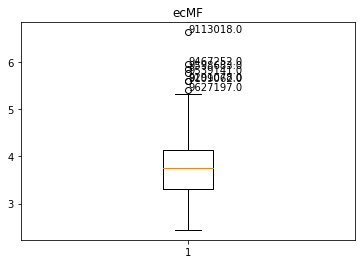

In [31]:
ys = ecmf.to_numpy()
pylt.boxplot(ys)
q1 = ecmf.quantile(.25)
q3 = ecmf.quantile(.75)
ot = q3 + 1.5 * (q3 - q1)
ob = q1 - 1.5 * (q3 - q1)
for i, y in enumerate(ys):
    if y > ot or y < ob:
        pylt.text(1, y, df.iloc[i]['dir'])
        print(f'Segmentation {df.iloc[i]["dir"]} is an outlier ({abs(y - ecmf.median()):.2f} total deviation from median)')
        
pylt.title('ecMF')

### Tibia

Segmentation 9186589.0 is an outlier (1.46 total deviation from median)
Segmentation 9218935.0 is an outlier (1.62 total deviation from median)
Segmentation 9180558.0 is an outlier (1.33 total deviation from median)
Segmentation 9249025.0 is an outlier (1.51 total deviation from median)
Segmentation 9227993.0 is an outlier (1.33 total deviation from median)
Segmentation 9241424.0 is an outlier (1.30 total deviation from median)
Segmentation 9745458.0 is an outlier (1.27 total deviation from median)
Segmentation 9606490.0 is an outlier (1.96 total deviation from median)
Segmentation 9691663.0 is an outlier (1.35 total deviation from median)
Segmentation 9566781.0 is an outlier (1.51 total deviation from median)
Segmentation 9388068.0 is an outlier (1.73 total deviation from median)
Segmentation 9003430.0 is an outlier (1.94 total deviation from median)
Segmentation 9094693.0 is an outlier (1.53 total deviation from median)
Segmentation 9130672.0 is an outlier (2.19 total deviation from 

Text(0.5, 1.0, 'eLT')

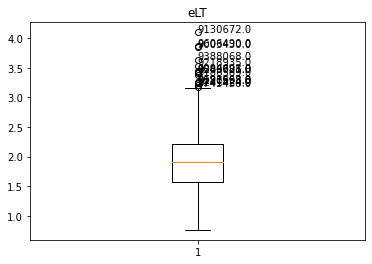

In [32]:
ys = elt.to_numpy()
pylt.boxplot(ys)
q1 = elt.quantile(.25)
q3 = elt.quantile(.75)
ot = q3 + 1.5 * (q3 - q1)
ob = q1 - 1.5 * (q3 - q1)
for i, y in enumerate(ys):
    if y > ot or y < ob:
        pylt.text(1, y, df.iloc[i]['dir'])
        print(f'Segmentation {df.iloc[i]["dir"]} is an outlier ({abs(y - elt.median()):.2f} total deviation from median)')
        
pylt.title('eLT')

Segmentation 9258562.0 is an outlier (1.85 total deviation from median)
Segmentation 9152295.0 is an outlier (1.66 total deviation from median)
Segmentation 9700341.0 is an outlier (1.69 total deviation from median)
Segmentation 9686590.0 is an outlier (2.11 total deviation from median)
Segmentation 9933836.0 is an outlier (1.77 total deviation from median)
Segmentation 9556464.0 is an outlier (1.64 total deviation from median)
Segmentation 9314341.0 is an outlier (2.02 total deviation from median)
Segmentation 9003430.0 is an outlier (1.68 total deviation from median)


Text(0.5, 1.0, 'pLT')

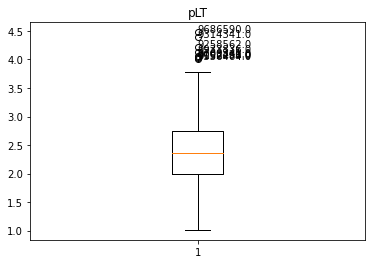

In [33]:
ys = plt.to_numpy()
pylt.boxplot(ys)
q1 = plt.quantile(.25)
q3 = plt.quantile(.75)
ot = q3 + 1.5 * (q3 - q1)
ob = q1 - 1.5 * (q3 - q1)
for i, y in enumerate(ys):
    if y > ot or y < ob:
        pylt.text(1, y, df.iloc[i]['dir'])
        print(f'Segmentation {df.iloc[i]["dir"]} is an outlier ({abs(y - plt.median()):.2f} total deviation from median)')
        
pylt.title('pLT')

Segmentation 9995338.0 is an outlier (3.30 total deviation from median)
Segmentation 9732959.0 is an outlier (3.24 total deviation from median)
Segmentation 9606490.0 is an outlier (5.43 total deviation from median)
Segmentation 9987407.0 is an outlier (3.17 total deviation from median)
Segmentation 9686590.0 is an outlier (3.94 total deviation from median)
Segmentation 9287241.0 is an outlier (4.32 total deviation from median)
Segmentation 9332345.0 is an outlier (5.23 total deviation from median)
Segmentation 9052956.0 is an outlier (5.38 total deviation from median)
Segmentation 9108714.0 is an outlier (3.97 total deviation from median)
Segmentation 9094693.0 is an outlier (4.16 total deviation from median)


Text(0.5, 1.0, 'iLT')

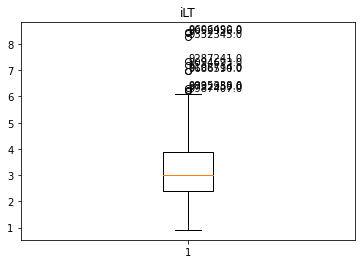

In [34]:
ys = ilt.to_numpy()
pylt.boxplot(ys)
q1 = ilt.quantile(.25)
q3 = ilt.quantile(.75)
ot = q3 + 1.5 * (q3 - q1)
ob = q1 - 1.5 * (q3 - q1)
for i, y in enumerate(ys):
    if y > ot or y < ob:
        pylt.text(1, y, df.iloc[i]['dir'])
        print(f'Segmentation {df.iloc[i]["dir"]} is an outlier ({abs(y - ilt.median()):.2f} total deviation from median)')
        
pylt.title('iLT')

Segmentation 9249025.0 is an outlier (2.18 total deviation from median)
Segmentation 9606490.0 is an outlier (3.00 total deviation from median)
Segmentation 9686590.0 is an outlier (2.46 total deviation from median)
Segmentation 9468561.0 is an outlier (2.40 total deviation from median)
Segmentation 9388068.0 is an outlier (2.70 total deviation from median)
Segmentation 9323079.0 is an outlier (2.16 total deviation from median)
Segmentation 9108714.0 is an outlier (2.18 total deviation from median)


Text(0.5, 1.0, 'aLT')

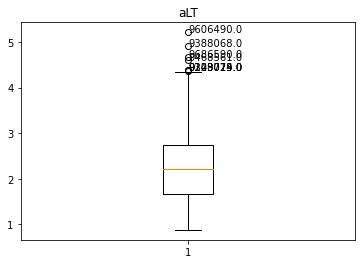

In [35]:
ys = alt.to_numpy()
pylt.boxplot(ys)
q1 = alt.quantile(.25)
q3 = alt.quantile(.75)
ot = q3 + 1.5 * (q3 - q1)
ob = q1 - 1.5 * (q3 - q1)
for i, y in enumerate(ys):
    if y > ot or y < ob:
        pylt.text(1, y, df.iloc[i]['dir'])
        print(f'Segmentation {df.iloc[i]["dir"]} is an outlier ({abs(y - alt.median()):.2f} total deviation from median)')
        
pylt.title('aLT')

Segmentation 9220441.0 is an outlier (2.42 total deviation from median)
Segmentation 9817241.0 is an outlier (2.50 total deviation from median)
Segmentation 9606490.0 is an outlier (2.60 total deviation from median)
Segmentation 9760079.0 is an outlier (2.86 total deviation from median)
Segmentation 9351700.0 is an outlier (2.72 total deviation from median)
Segmentation 9388068.0 is an outlier (2.62 total deviation from median)
Segmentation 9102858.0 is an outlier (2.58 total deviation from median)
Segmentation 9052956.0 is an outlier (2.67 total deviation from median)


Text(0.5, 1.0, 'cLT')

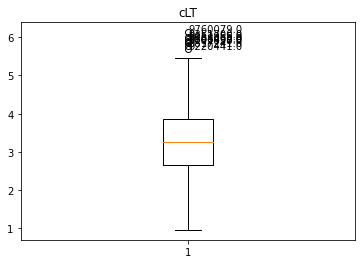

In [36]:
ys = clt.to_numpy()
pylt.boxplot(ys)
q1 = clt.quantile(.25)
q3 = clt.quantile(.75)
ot = q3 + 1.5 * (q3 - q1)
ob = q1 - 1.5 * (q3 - q1)
for i, y in enumerate(ys):
    if y > ot or y < ob:
        pylt.text(1, y, df.iloc[i]['dir'])
        print(f'Segmentation {df.iloc[i]["dir"]} is an outlier ({abs(y - clt.median()):.2f} total deviation from median)')
        
pylt.title('cLT')

Segmentation 9249025.0 is an outlier (2.77 total deviation from median)
Segmentation 9766939.0 is an outlier (2.10 total deviation from median)
Segmentation 9291078.0 is an outlier (2.15 total deviation from median)
Segmentation 9108714.0 is an outlier (2.26 total deviation from median)


Text(0.5, 1.0, 'eMT')

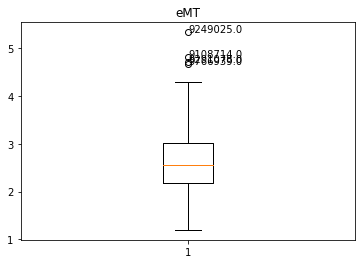

In [37]:
ys = emt.to_numpy()
pylt.boxplot(ys)
q1 = emt.quantile(.25)
q3 = emt.quantile(.75)
ot = q3 + 1.5 * (q3 - q1)
ob = q1 - 1.5 * (q3 - q1)
for i, y in enumerate(ys):
    if y > ot or y < ob:
        pylt.text(1, y, df.iloc[i]['dir'])
        print(f'Segmentation {df.iloc[i]["dir"]} is an outlier ({abs(y - emt.median()):.2f} total deviation from median)')
        
pylt.title('eMT')

Segmentation 9249025.0 is an outlier (2.10 total deviation from median)
Segmentation 9862541.0 is an outlier (2.19 total deviation from median)
Segmentation 9598683.0 is an outlier (2.07 total deviation from median)
Segmentation 9341240.0 is an outlier (2.13 total deviation from median)
Segmentation 9291078.0 is an outlier (3.75 total deviation from median)
Segmentation 9330729.0 is an outlier (2.13 total deviation from median)
Segmentation 9319367.0 is an outlier (2.34 total deviation from median)


Text(0.5, 1.0, 'pMT')

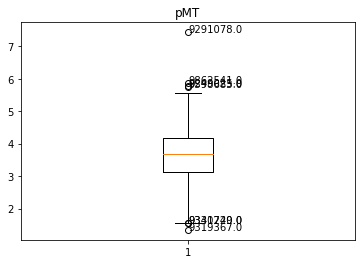

In [38]:
ys = pmt.to_numpy()
pylt.boxplot(ys)
q1 = pmt.quantile(.25)
q3 = pmt.quantile(.75)
ot = q3 + 1.5 * (q3 - q1)
ob = q1 - 1.5 * (q3 - q1)
for i, y in enumerate(ys):
    if y > ot or y < ob:
        pylt.text(1, y, df.iloc[i]['dir'])
        print(f'Segmentation {df.iloc[i]["dir"]} is an outlier ({abs(y - pmt.median()):.2f} total deviation from median)')
        
pylt.title('pMT')

Segmentation 9606490.0 is an outlier (4.70 total deviation from median)
Segmentation 9468561.0 is an outlier (5.18 total deviation from median)
Segmentation 9539141.0 is an outlier (5.78 total deviation from median)
Segmentation 9341240.0 is an outlier (4.34 total deviation from median)
Segmentation 9035647.0 is an outlier (5.20 total deviation from median)
Segmentation 9049185.0 is an outlier (5.11 total deviation from median)
Segmentation 9052956.0 is an outlier (5.22 total deviation from median)
Segmentation 9081306.0 is an outlier (3.89 total deviation from median)
Segmentation 9024940.0 is an outlier (4.42 total deviation from median)
Segmentation 9052335.0 is an outlier (7.32 total deviation from median)
Segmentation 9101066.0 is an outlier (4.49 total deviation from median)


Text(0.5, 1.0, 'iMT')

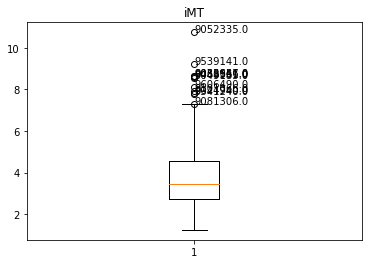

In [39]:
ys = imt.to_numpy()
pylt.boxplot(ys)
q1 = imt.quantile(.25)
q3 = imt.quantile(.75)
ot = q3 + 1.5 * (q3 - q1)
ob = q1 - 1.5 * (q3 - q1)
for i, y in enumerate(ys):
    if y > ot or y < ob:
        pylt.text(1, y, df.iloc[i]['dir'])
        print(f'Segmentation {df.iloc[i]["dir"]} is an outlier ({abs(y - imt.median()):.2f} total deviation from median)')
        
pylt.title('iMT')

Segmentation 9249025.0 is an outlier (2.89 total deviation from median)
Segmentation 9291078.0 is an outlier (4.49 total deviation from median)
Segmentation 9388068.0 is an outlier (3.31 total deviation from median)
Segmentation 9066770.0 is an outlier (3.09 total deviation from median)


Text(0.5, 1.0, 'aMT')

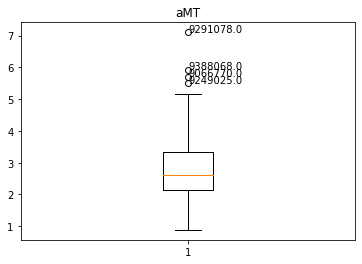

In [40]:
ys = amt.to_numpy()
pylt.boxplot(ys)
q1 = amt.quantile(.25)
q3 = amt.quantile(.75)
ot = q3 + 1.5 * (q3 - q1)
ob = q1 - 1.5 * (q3 - q1)
for i, y in enumerate(ys):
    if y > ot or y < ob:
        pylt.text(1, y, df.iloc[i]['dir'])
        print(f'Segmentation {df.iloc[i]["dir"]} is an outlier ({abs(y - amt.median()):.2f} total deviation from median)')
        
pylt.title('aMT')

Text(0.5, 1.0, 'cMT')

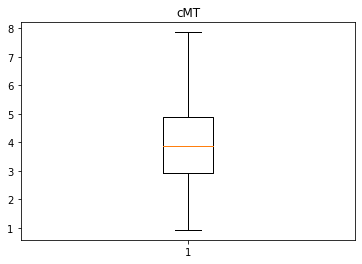

In [41]:
ys = cmt.to_numpy()
pylt.boxplot(ys)
q1 = cmt.quantile(.25)
q3 = cmt.quantile(.75)
ot = q3 + 1.5 * (q3 - q1)
ob = q1 - 1.5 * (q3 - q1)
for i, y in enumerate(ys):
    if y > ot or y < ob:
        pylt.text(1, y, df.iloc[i]['dir'])
        print(f'Segmentation {df.iloc[i]["dir"]} is an outlier ({abs(y - cmt.median()):.2f} total deviation from median)')
        
pylt.title('cMT')